# Customer Churn Prediction using Neural Network

## I. Introduction

### Further Analysis

1. **Geography Distribution**, explore the relationship between geography and other customer attributes to identify any regional patterns or preferences.
2. **Credit Score Distribution**, explore the relationship between credit scores and other customer attributes to identify any underlying patterns or correlations.
3. **Age Distribution**, explore the relationship between age and other attributes to identify any age-related patterns or preferences.



## II. Import Libraries & Helper Functions

### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Helper Functions

Reusable code blocks that perform specific tasks within a data science notebook. They encapsulate common operations or complex logic, making your code more modular, efficient, and easier to maintain.

#### (`visualize_distribution`)

Visualize the distribution of any specified column within a given dataset. It uses a histogram with an optional kernel density estimate (KDE) to provide a clear representation of the data distribution, helping to understand the frequency of different values in the specified column.

**Parameters**
1. `data`: DataFrame containing the data.
2. `column_name`: String specifying the column to visualize.
3. `figure_size`: Tuple specifying the dimensions of the plot (default is (8, 6)).
4. `bin_count`: Integer indicating the number of bins for the histogram (default is 30).
5. `discrete`: Boolean indicating whether the data is discrete (default is False).

In [2]:
def visualize_distribution(data, column_name, figure_size=(8, 6), bin_count=30, discrete=False):
    plt.figure(figsize=figure_size)
    sns.histplot(data=data, x=column_name, bins=bin_count, kde=True, discrete=discrete)
    plt.title(f'{column_name.capitalize()} Distribution')
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Frequency')
    plt.show()

## III. Data Loading & Initial Inspection

- Display the first five rows

In [3]:
customers_url = 'https://raw.githubusercontent.com/cogxen/databank/main/bank-customer-churn/customers.csv'

# Display the first five rows
customers = pd.read_csv(customers_url)
customers.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- Preview if the dataset has null values

In [4]:
print(f'Missing values:\n{customers.isnull().sum()}')

Missing values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


- Preview if there's any duplicated records

In [5]:
print(f'Number of duplicated records: {customers.duplicated().sum()}')

Number of duplicated records: 0


## IV. Exploratory Data Analysis

To gain deeper insights into the dataset, it is essential to visualize the distributions of key features. This will allow for a more comprehensive understanding of the characteristics and patterns present within the data.

### Distributions

#### Geography

Visualizing the geography distribution helps you understand where your bank's customers are primarily located.

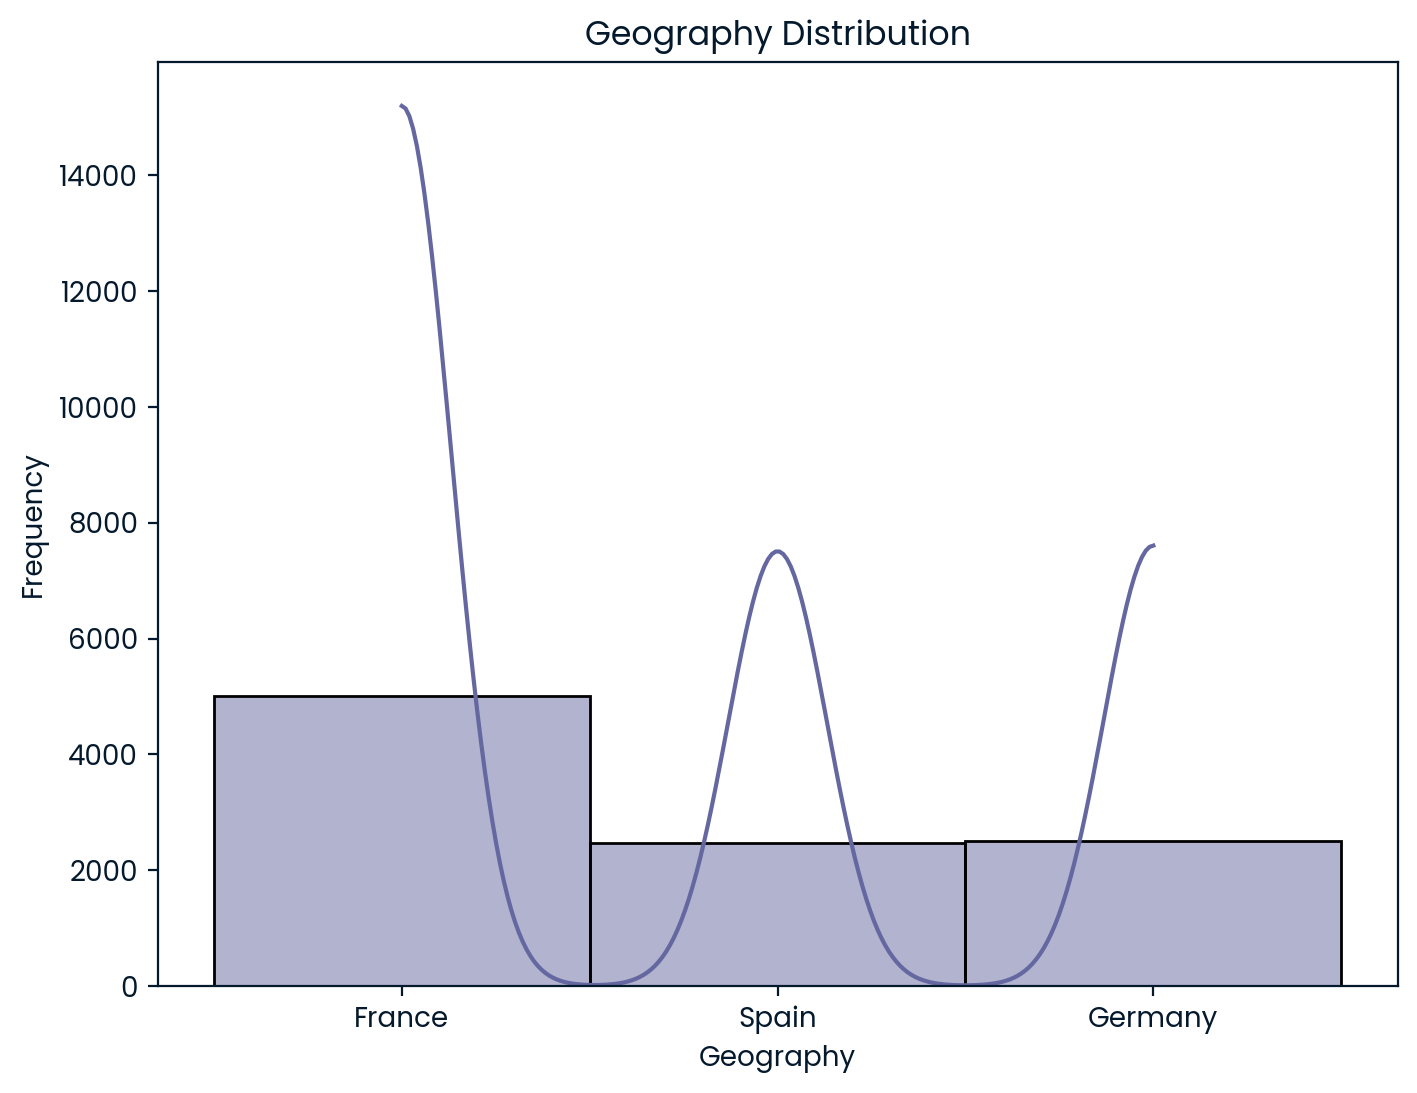

In [6]:
visualize_distribution(customers, 'Geography', bin_count=15, discrete=True)

**Insight(s)**: Based on the graph, the bank's customer base is concentrated in France, with a more diverse distribution in Spain and Germany. The bimodal distribution in Germany suggests the presence of two distinct customer segments.

#### Credit Score

Credit scores are a critical factor in assessing credit risk. Visualizing the distribution helps in understanding the overall creditworthiness of the customer base.

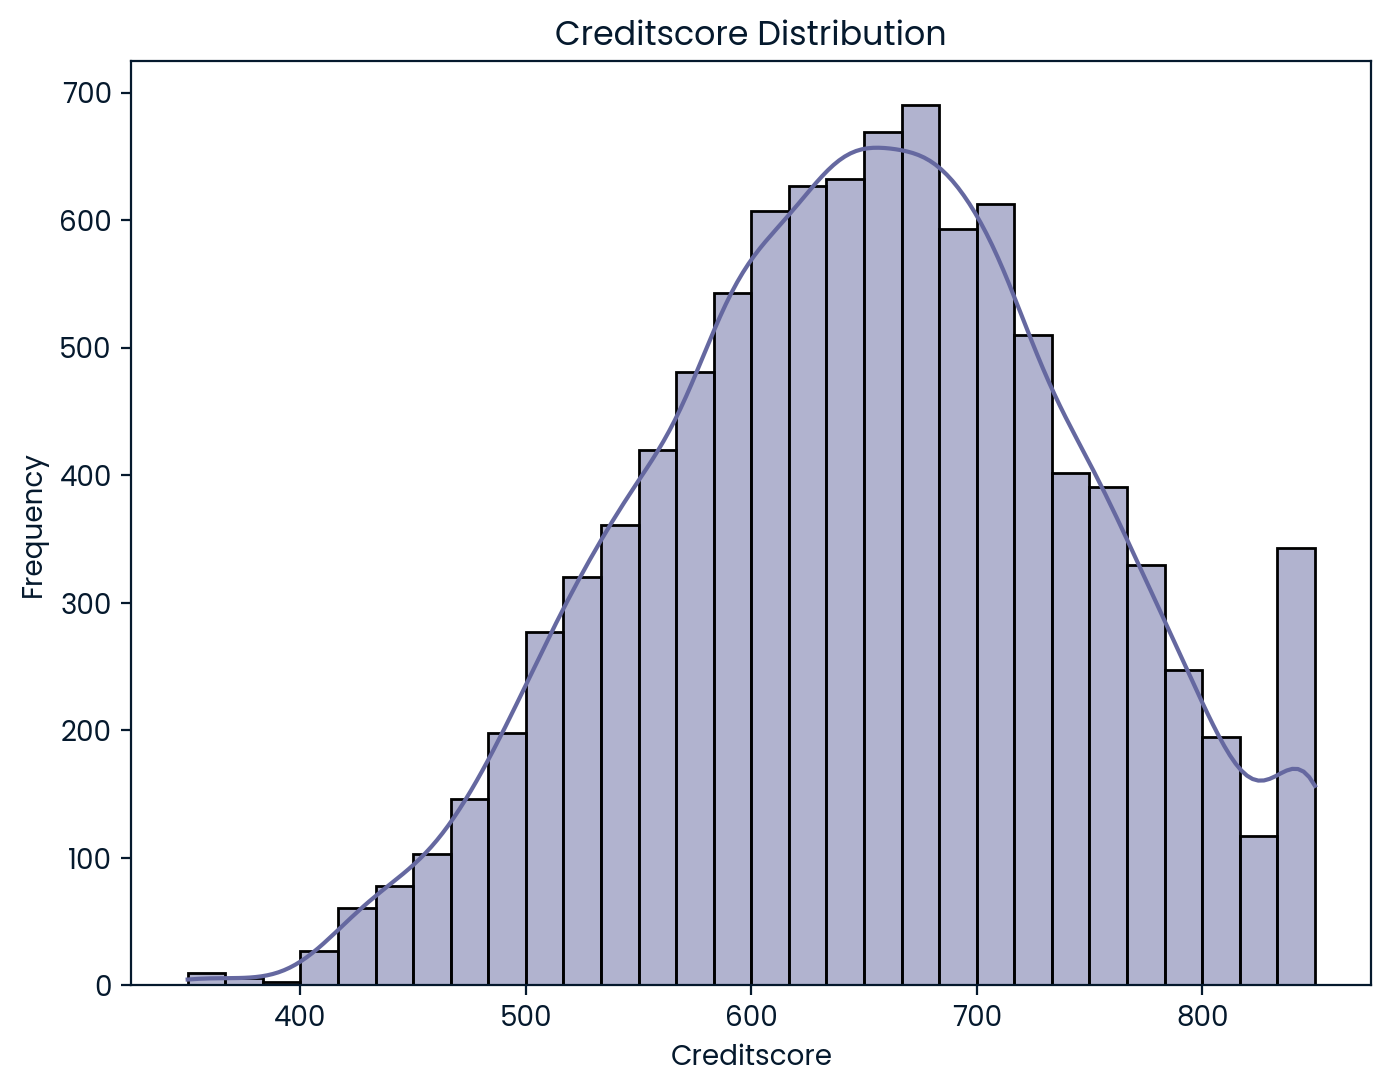

In [7]:
visualize_distribution(customers, 'CreditScore', bin_count=30)

**Insight(s)**: Based on the analysis, the credit scores are exhibit a typical normal distribution, with a majority of individuals having credit scores around the median, the slight right skewed indicates the presence of a few individuals with exceptionally high credit scores.

#### Age

Age is a fundamental demographic variable that influences customer behavior and preferences. Visualizing the age distribution helps in understanding the bank's customer demographics.

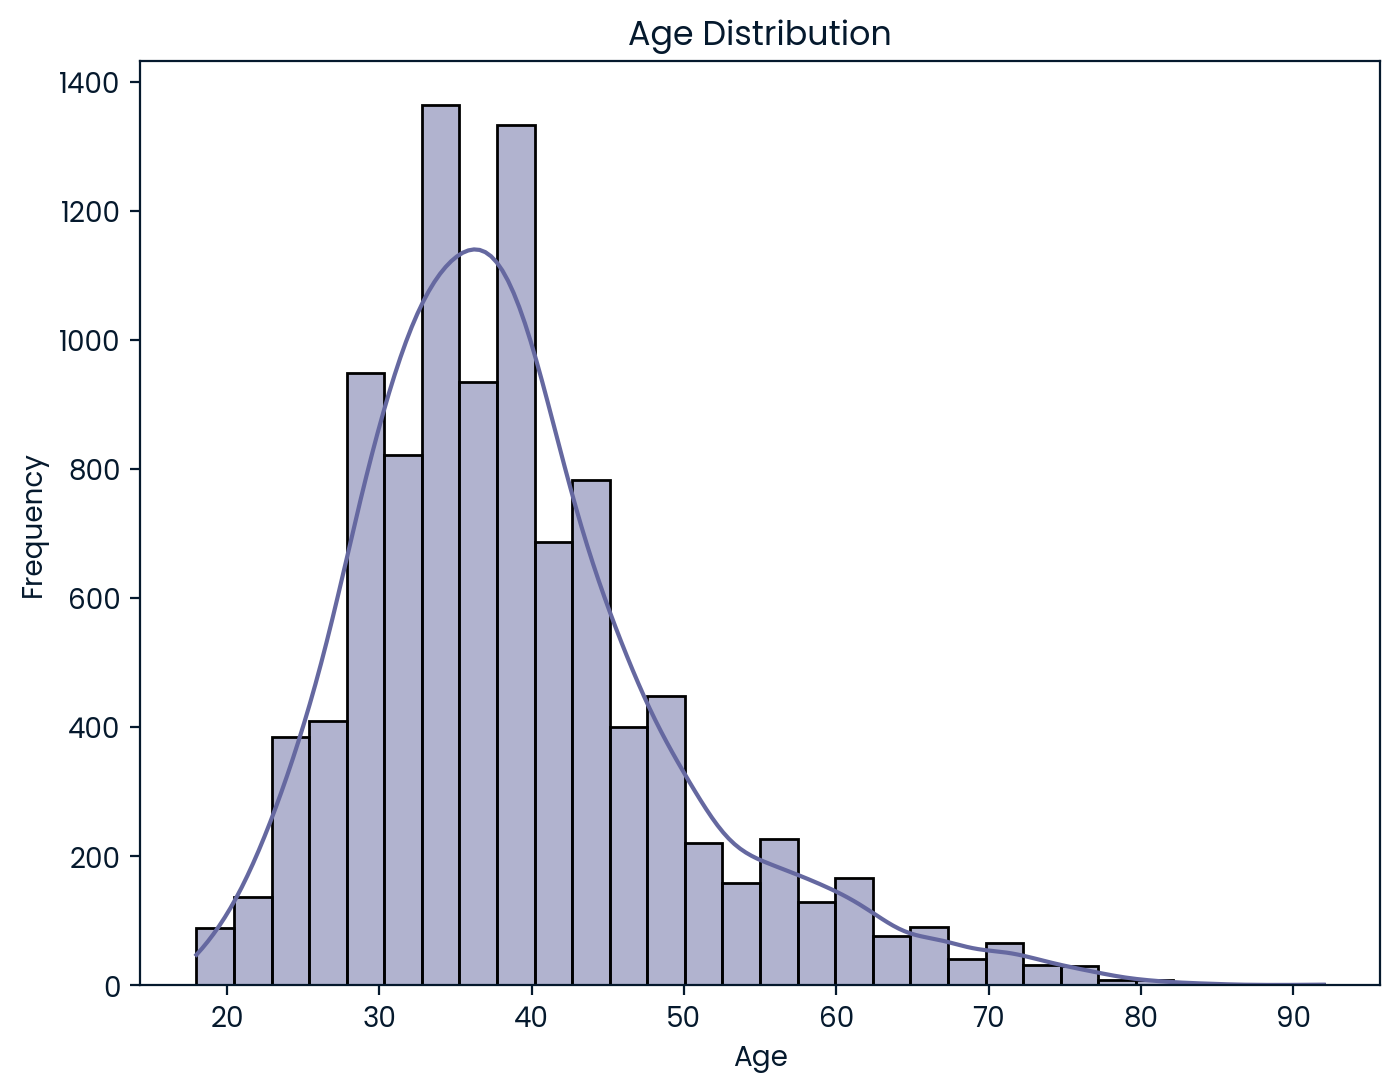

In [8]:
visualize_distribution(customers, 'Age', bin_count=30)

**Insight(s)**: Based on this analysis, the age distribution in the dataset is skewed towards younger individuals, with a concentration around the age of 35-40. The wide spread of the distribution suggests a diverse age range among the individuals.

### Relationships